In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [178]:
df=pd.read_csv('gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [179]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

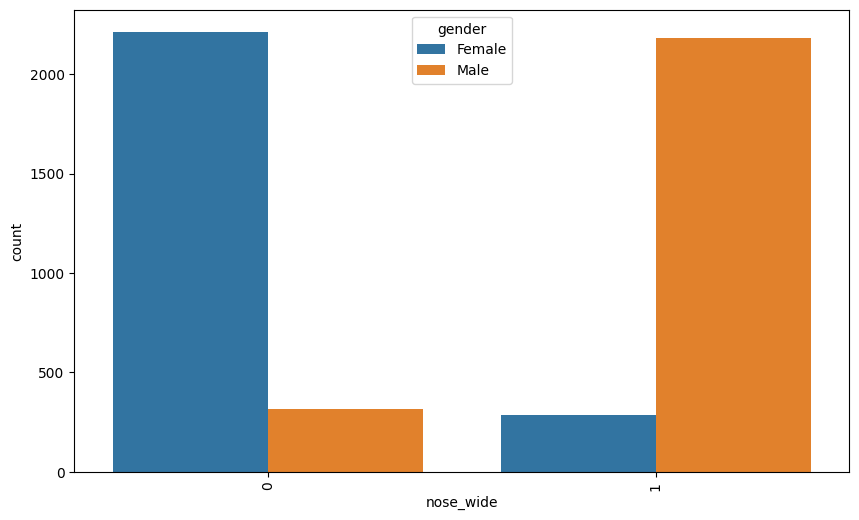

In [180]:
xpoints=df['nose_wide']
ypoints=df['gender']
plt.figure(figsize=(10,6))
sns.countplot(x=xpoints, hue=ypoints,data=df)
plt.xticks(rotation='vertical')
plt.show()

In [226]:
df['forehead_height_cm'].max()

7.1

In [181]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['gender']=encoder.fit_transform(df['gender'])
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [182]:
x=df.drop(['gender'],axis=1)
y=df.drop(['long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long'],axis=1)


# Logistic regression

In [183]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [184]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x,y)


C:\Users\sonyj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [224]:
lr_model.predict([[1,13.2,6.2,0,0,0,0]])

C:\Users\sonyj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [186]:
X_train.shape

(4000, 7)

In [187]:
X_test.shape

(1001, 7)

In [188]:
lr_model.score(X_test,y_test)

0.973026973026973

In [189]:
# Model evaluation on train data
lr_y_pred_train=lr_model.predict(X_train)
lr_accuracy_train=accuracy_score(y_train,lr_y_pred_train)
print(f"Train Accuracy: {round(lr_accuracy_train * 100,2)}%")

Train Accuracy: 96.75%


In [190]:
# Model evaluation on test data
lr_y_pred_test=lr_model.predict(X_test)
lr_accuracy_test=accuracy_score(y_test,lr_y_pred_test)
print(f"Train Accuracy: {round(lr_accuracy_test * 100,2)}%")

Train Accuracy: 97.3%


In [191]:
lr_model.score(X_test,lr_y_pred_test)

1.0

In [192]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,lr_y_pred_test)
cm

array([[489,  15],
       [ 12, 485]], dtype=int64)

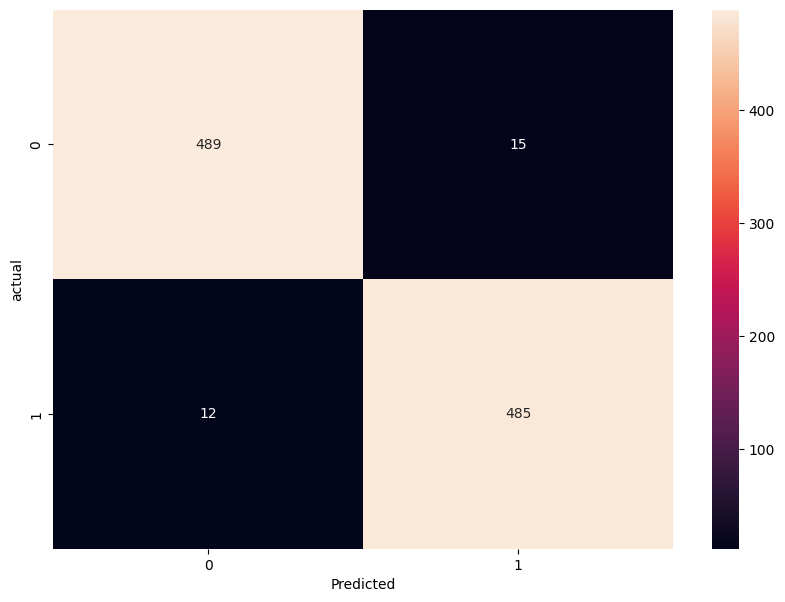

In [193]:
plt.figure(figsize=(10,7)) 
sns.heatmap(cm,annot=True,fmt='d') 
plt.xlabel('Predicted') 
plt.ylabel('actual') 
plt.show()

In [194]:
import pickle

with open('logistic1.pickle','wb') as newfile_1:
    pickle.dump(lr_model,newfile_1)

# K- Nearest

In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [196]:
knn_model=KNeighborsClassifier(n_neighbors=20)
knn_model.fit(x,y)

C:\Users\sonyj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [197]:
# Model evaluation on train data
knn_y_pred_train=knn_model.predict(X_train)
knn_accuracy_train=accuracy_score(y_train,knn_y_pred_train)
print(f"Train Accuracy: {round(knn_accuracy_train * 100,2)}%")

Train Accuracy: 97.2%


In [198]:
# Model evaluation on test data
knn_y_pred_test=knn_model.predict(X_test)
knn_accuracy_test=accuracy_score(y_test,knn_y_pred_test)
print(f"Train Accuracy: {round(knn_accuracy_test * 100,2)}%")

Train Accuracy: 98.1%


In [199]:
knn_model.score(X_test,y_test)

0.981018981018981

In [200]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,knn_y_pred_test)
cm

array([[499,   5],
       [ 14, 483]], dtype=int64)

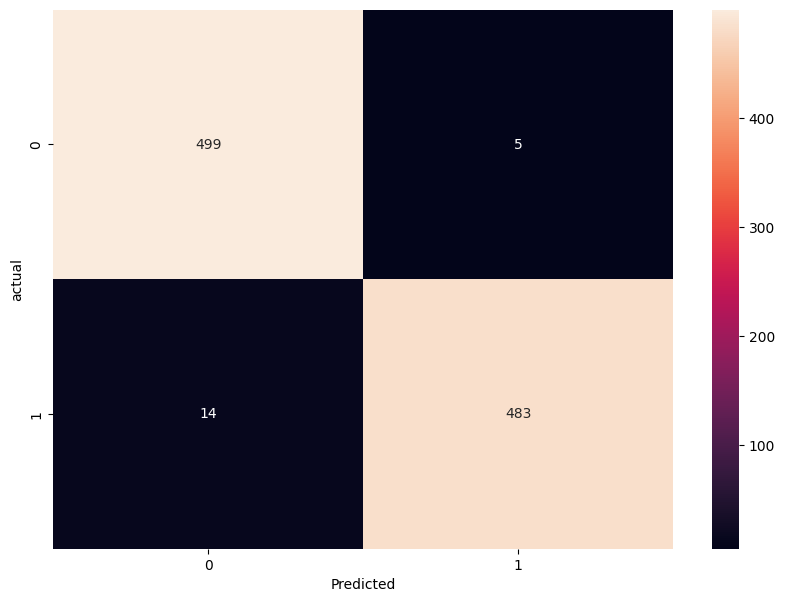

In [201]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted') 
plt.ylabel('actual') 
plt.show()


In [202]:
with open('KNearest1.pickle','wb') as newfile_2:
   pickle.dump(knn_model,newfile_2)

# Decision Tree

In [203]:
from sklearn.tree import DecisionTreeClassifier

In [204]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x,y)

DecisionTreeClassifier()

In [205]:
# Model evaluation on train data

dt_y_pred_train=dt_model.predict(X_train)
dt_accuracy_train=accuracy_score(y_train,dt_y_pred_train)
print(f"Train Accuracy: {round(dt_accuracy_train * 100,2)}%")

Train Accuracy: 99.83%


In [206]:
# Model evaluation on test data

dt_y_pred_test=dt_model.predict(X_test)
dt_accuracy_test=accuracy_score(y_test,dt_y_pred_test)
print(f"Train Accuracy: {round(dt_accuracy_test * 100,2)}%")

Train Accuracy: 99.9%


In [207]:
dt_model.score(X_test,y_test)

0.999000999000999

In [208]:
X_test.shape

(1001, 7)

In [209]:
cm=confusion_matrix(y_test,dt_y_pred_test)
cm

array([[504,   0],
       [  1, 496]], dtype=int64)

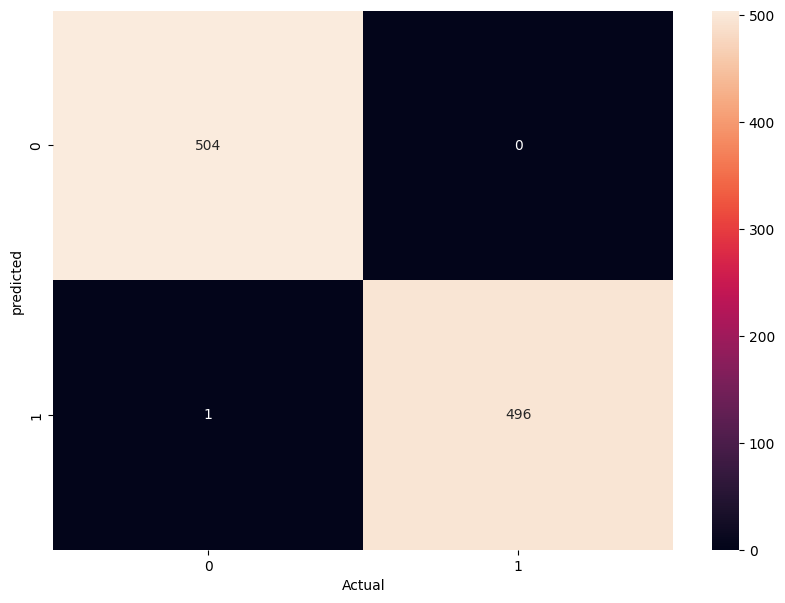

In [210]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [211]:
with open('Decisiontree1.pickle','wb') as newfile_3:
    pickle.dump(dt_model,newfile_3)

# Random Forest

In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
rf_model=RandomForestClassifier(n_estimators=20)
rf_model.fit(x,y)

C:\Users\sonyj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=20)

In [214]:
# Model evaluation on train data

rf_y_pred_train=rf_model.predict(X_train)
rf_accuracy_train=accuracy_score(y_train,rf_y_pred_train)
print(f"Train Accuracy: {round(rf_accuracy_train * 100,2)}%")

Train Accuracy: 99.65%


In [215]:
# Model evaluation on test data

rf_y_pred_test=rf_model.predict(X_test)
rf_accuracy_test=accuracy_score(y_test,rf_y_pred_test)
print(f"Train Accuracy: {round(rf_accuracy_test * 100,2)}%")

Train Accuracy: 100.0%


In [216]:
cm=confusion_matrix(y_test,rf_y_pred_test)
cm

array([[504,   0],
       [  0, 497]], dtype=int64)

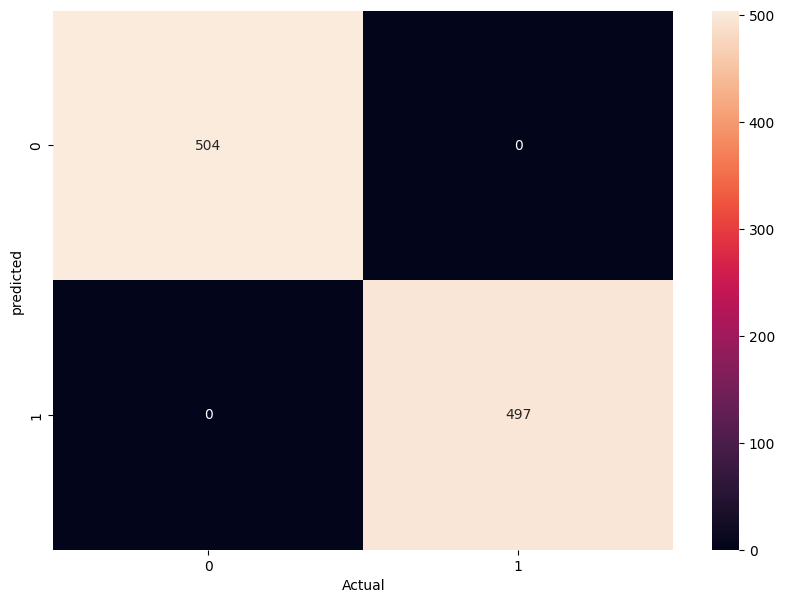

In [217]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [218]:
with open('Randomforest1.pickle','wb') as newfile_4:
    pickle.dump(rf_model,newfile_4)

In [219]:
classification_report={'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier'],
                       'train_Accuracy':[lr_accuracy_train,knn_accuracy_train,dt_accuracy_train,rf_accuracy_train],
                       'test_accuracy':[lr_accuracy_test,knn_accuracy_test,dt_accuracy_test,rf_accuracy_test]}
                       
                      

In [220]:
df2=pd.DataFrame(classification_report)
df2

,Model,train_Accuracy,test_accuracy
0,LogisticRegression,0.96750,0.973027
1,KNeighborsClassifier,0.97200,0.981019
2,DecisionTreeClassifier,0.99825,0.999001
3,RandomForestClassifier,0.99650,1.000000
